In [9]:
import numpy as np
import pandas as pd
import plotly
import plotly.figure_factory as ff
import plotly.graph_objs as go
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [10]:
data = pd.read_csv('task_b.csv')
data=data.iloc[:,1:]

In [11]:
data.head()

,f1,f2,f3,y
0,-195.871045,-14843.084171,5.532140,1.0
1,-1217.183964,-4068.124621,4.416082,1.0
2,9.138451,4413.412028,0.425317,0.0
3,363.824242,15474.760647,1.094119,0.0
4,-768.812047,-7963.932192,1.870536,0.0


In [12]:
data.corr()['y']

f1    0.067172
f2   -0.017944
f3    0.839060
y     1.000000
Name: y, dtype: float64

In [13]:
data.std()

f1      488.195035
f2    10403.417325
f3        2.926662
y         0.501255
dtype: float64

In [14]:
X=data[['f1','f2','f3']].values
Y=data['y'].values
print(X.shape)
print(Y.shape)

(200, 3)
(200,)


# What if our features are with different variance 

<pre>
* <b>As part of this task you will observe how linear models work in case of data having feautres with different variance</b>
* <b>from the output of the above cells you can observe that var(F2)>>var(F1)>>Var(F3)</b>

> <b>Task1</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance

> <b>Task2</b>:
    1. Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance
    2. Apply SVM(SGDClassifier with hinge) on 'data' after standardization 
       i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

</pre>

# Task 1

### 1.  Apply Logistic regression(SGDClassifier with logloss) on 'data' and check the feature importance

In [19]:
from sklearn import linear_model
LR = linear_model.SGDClassifier(loss='log', eta0 = 0.0001, alpha = 0.0001, penalty = 'l2', random_state = 15, verbose = 2, n_jobs = -1 )

In [22]:
D_train = data[['f1', 'f2', 'f3']].values
print("1. Data Type of d_train: {}", [type(D_train)])
print("2. Shape of d_train: {}\n\n", [D_train.shape])

y = data[['y']].values
print("1. Data Type of y: {}", [type(y)])
print("2. Shape of y: ", [y.shape])

1. Data Type of d_train: {} [<class 'numpy.ndarray'>]
2. Shape of d_train: {}

 [(200, 3)]
1. Data Type of y: {} [<class 'numpy.ndarray'>]
2. Shape of y:  [(200, 1)]


In [23]:
y = y.reshape(-1)

In [25]:
LR.fit(D_train, y)

-- Epoch 1
Norm: 89870.22, NNZs: 3, Bias: -155.051327, T: 200, Avg. loss: 227510618.879137
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 43791.04, NNZs: 3, Bias: -144.898405, T: 400, Avg. loss: 200670830.244106
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 21826.51, NNZs: 3, Bias: -167.580253, T: 600, Avg. loss: 220221238.438343
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 44052.83, NNZs: 3, Bias: -220.577819, T: 800, Avg. loss: 179903697.744537
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 43829.42, NNZs: 3, Bias: -246.905532, T: 1000, Avg. loss: 159178154.202827
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 45138.87, NNZs: 3, Bias: -208.546352, T: 1200, Avg. loss: 142129650.458868
Total training time: 0.01 seconds.
-- Epoch 7
Norm: 27699.02, NNZs: 3, Bias: -168.679560, T: 1400, Avg. loss: 134776289.480256
Total training time: 0.01 seconds.
-- Epoch 8
Norm: 30003.76, NNZs: 3, Bias: -147.095138, T: 1600, Avg. loss: 122695625.336222
Total training time: 0.

SGDClassifier(eta0=0.0001, loss='log', n_jobs=-1, random_state=15, verbose=2)

Feature: 0, Score: 3925.14601
Feature: 1, Score: -16033.05764
Feature: 2, Score: 10502.94022


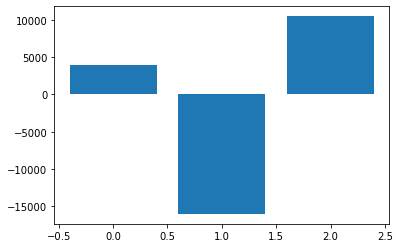

In [28]:
from matplotlib import pyplot
importance =LR.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [29]:
print(LR.coef_)
print(LR.intercept_)

[[  3925.14601273 -16033.05764291  10502.94022174]]
[-239.12473731]


### 2. Apply SVM(SGDClassifier with hinge) on 'data' and check the feature importance

In [30]:
SVM = linear_model.SGDClassifier(loss='log', eta0 = 0.0001, alpha = 0.0001, penalty = 'l2', random_state = 15, verbose = 2, n_jobs = -1 )

In [31]:
SVM.fit(D_train,y)

-- Epoch 1
Norm: 89870.22, NNZs: 3, Bias: -155.051327, T: 200, Avg. loss: 227510618.879137
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 43791.04, NNZs: 3, Bias: -144.898405, T: 400, Avg. loss: 200670830.244106
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 21826.51, NNZs: 3, Bias: -167.580253, T: 600, Avg. loss: 220221238.438343
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 44052.83, NNZs: 3, Bias: -220.577819, T: 800, Avg. loss: 179903697.744537
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 43829.42, NNZs: 3, Bias: -246.905532, T: 1000, Avg. loss: 159178154.202827
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 45138.87, NNZs: 3, Bias: -208.546352, T: 1200, Avg. loss: 142129650.458868
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 27699.02, NNZs: 3, Bias: -168.679560, T: 1400, Avg. loss: 134776289.480256
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 30003.76, NNZs: 3, Bias: -147.095138, T: 1600, Avg. loss: 122695625.336222
Total training time: 0.

SGDClassifier(eta0=0.0001, loss='log', n_jobs=-1, random_state=15, verbose=2)

Feature: 0, Score: 3925.14601
Feature: 1, Score: -16033.05764
Feature: 2, Score: 10502.94022


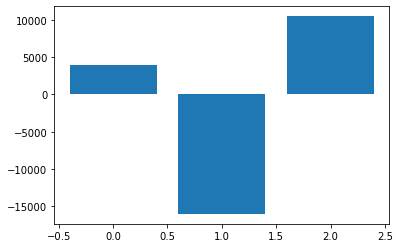

In [32]:
importance_SVM =SVM.coef_[0]
for i,v in enumerate(importance_SVM):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance_SVM))], importance_SVM)
pyplot.show()

In [33]:
print(SVM.coef_)
print(SVM.intercept_)

[[  3925.14601273 -16033.05764291  10502.94022174]]
[-239.12473731]


<h3><font color='blue'> Make sure you write the observations for each task, why a particular feautre got more importance than others</font></h3>

# Observation:
1. In both case of LR and SVM when data have diffrent varaince, or scale, The Freature importance cant be quantified or understood that what is happending.

2. From the output above, we can see that, for both Logistic Regression and SVM, feature 1 has the highest impact to classify the dependent variable (Y). Before we accept this as our "best" model, we have to make sure that this model is correct. 

3. Looking at the correlation, feature 3 is the most correlated feature to the dependent variable. Thus, feature 3 should have the highest weight amongst other features. However, since the features are not standardized, we see that feature 1 has the highest weight instead. 
f1 =   0.067172
f2  = -0.017944
f3  =  0.839060
y   =  1.000000


# Task2:

### 1. Apply Logistic regression(SGDClassifier with logloss) on 'data' after standardization i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

In [34]:
scaler = StandardScaler()

In [37]:
STD_D_TRAIN = scaler.fit_transform(D_train)

In [38]:
LR.fit(STD_D_TRAIN,y)

-- Epoch 1
Norm: 53.31, NNZs: 3, Bias: -5.276812, T: 200, Avg. loss: 1.866743
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 47.34, NNZs: 3, Bias: 3.430650, T: 400, Avg. loss: 1.352641
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 43.99, NNZs: 3, Bias: 2.140512, T: 600, Avg. loss: 1.213044
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 33.54, NNZs: 3, Bias: -5.951509, T: 800, Avg. loss: 1.279978
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 32.19, NNZs: 3, Bias: 1.875443, T: 1000, Avg. loss: 0.999923
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 31.45, NNZs: 3, Bias: -0.998614, T: 1200, Avg. loss: 0.563070
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 32.57, NNZs: 3, Bias: 2.720694, T: 1400, Avg. loss: 0.687991
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 30.51, NNZs: 3, Bias: -2.435934, T: 1600, Avg. loss: 0.722018
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 28.04, NNZs: 3, Bias: -3.174216, T: 1800, Avg. loss: 0.807365
Total training ti

SGDClassifier(eta0=0.0001, loss='log', n_jobs=-1, random_state=15, verbose=2)

Feature: 0, Score: -0.29742
Feature: 1, Score: -0.66973
Feature: 2, Score: 10.35437


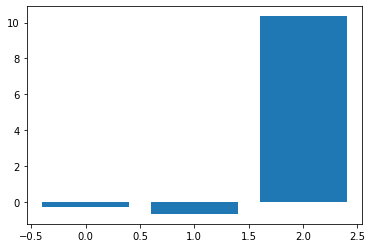

In [39]:
importance =LR.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### 2. Apply SVM(SGDClassifier with hinge) on 'data' after standardization i.e standardization(data, column wise): (column-mean(column))/std(column) and check the feature importance

In [40]:
SVM.fit(STD_D_TRAIN,y)

-- Epoch 1
Norm: 53.31, NNZs: 3, Bias: -5.276812, T: 200, Avg. loss: 1.866743
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 47.34, NNZs: 3, Bias: 3.430650, T: 400, Avg. loss: 1.352641
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 43.99, NNZs: 3, Bias: 2.140512, T: 600, Avg. loss: 1.213044
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 33.54, NNZs: 3, Bias: -5.951509, T: 800, Avg. loss: 1.279978
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 32.19, NNZs: 3, Bias: 1.875443, T: 1000, Avg. loss: 0.999923
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 31.45, NNZs: 3, Bias: -0.998614, T: 1200, Avg. loss: 0.563070
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 32.57, NNZs: 3, Bias: 2.720694, T: 1400, Avg. loss: 0.687991
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 30.51, NNZs: 3, Bias: -2.435934, T: 1600, Avg. loss: 0.722018
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 28.04, NNZs: 3, Bias: -3.174216, T: 1800, Avg. loss: 0.807365
Total training ti

SGDClassifier(eta0=0.0001, loss='log', n_jobs=-1, random_state=15, verbose=2)

Feature: 0, Score: -0.29742
Feature: 1, Score: -0.66973
Feature: 2, Score: 10.35437


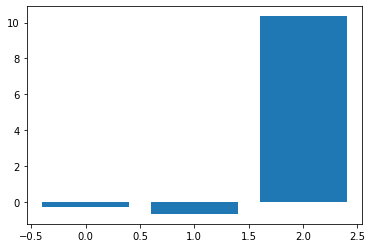

In [41]:
importance =SVM.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

<h3><font color='blue'> Make sure you write the observations for each task, why a particular feautre got more importance than others</font></h3>


# Observation:
1. we have standardize the data, we can see that feature 3 has the highest weight. 
2. Justifying our correlation matrix. 